In [1]:
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import sys
sys.path.append('..')

from lib import *

In [48]:
def serialize_int_arr(arr):
    return [int(x) for x in arr]

def serialize_float_arr(arr):
    return [float(x) for x in arr]

In [5]:
# only human host
df_t = load_iedb_tcellepitopes(human_only=True)
print(df_t.shape[0])

248879


In [6]:
# only MHC I epitopes
df_t = df_t[(df_t['MHC', 'Class']=='I') | (pd.isna(df_t['MHC', 'Class']))]
print(df_t.shape[0])

142895


In [7]:
# only epitopes of lengths in k
mask = df_t['Epitope', 'Description'].apply(len)==9
df_t = df_t[mask]
print(df_t.shape[0])

38609


In [8]:
# restric to Malaria ('Plasmodium falciparum')
pathogenproteomes = load_proteomes(only_pathogens=True)
row = pathogenproteomes.loc['Malaria']
malaria_name = row['iedbname']
malaria_path = datadir + row['path']
df_t = df_t[df_t['Epitope', 'Parent Species'].str.contains(malaria_name, na=False)]
print(df_t.shape[0])

232


In [22]:
# restrict to ELISPOT assay?
mask = df_t['Assay', 'Method/Technique'] == 'ELISPOT'
elispot_df_t = df_t[mask]
print(elispot_df_t.shape[0])

116


In [23]:
# positive
mask = df_t[('Assay', 'Qualitative Measure')] == 'Positive'
neg_mask = df_t[('Assay', 'Qualitative Measure')] == 'Negative'
positive = df_t[mask]
negative = df_t[neg_mask]
print(positive.shape[0])
print(negative.shape[0])

151
81


In [24]:
# positive with only ELISPOT
mask = elispot_df_t[('Assay', 'Qualitative Measure')] == 'Positive'
neg_mask = elispot_df_t[('Assay', 'Qualitative Measure')] == 'Negative'
positive_elispot = elispot_df_t[mask]
negative_elispot = elispot_df_t[neg_mask]
print(positive_elispot.shape[0])
print(negative_elispot.shape[0])

60
56


In [25]:
# Malaria Epitopes
epi_t = positive['Epitope', 'Description'].unique()
positive.shape

(151, 144)

In [26]:
epi_t_negative = negative['Epitope', 'Description'].unique()

In [27]:
# Malaria Epitopes
epi_t_elispot = positive_elispot['Epitope', 'Description'].unique()
epi_t_elispot.shape

(42,)

In [28]:
epi_t_negative_elispot = negative_elispot['Epitope', 'Description'].unique()
epi_t_negative_elispot.shape

(36,)

In [17]:
positive_elispot.loc[371886]

Reference       Assay IRI                                http://www.iedb.org/assay/6477114
                Reference IRI                        http://www.iedb.org/reference/1036317
                Type                                                            Literature
                PubMed ID                                                       32040522.0
                Authors                  Kwadwo A Kusi; Felix E Aggor; Linda E Amoah; D...
                                                               ...                        
Assay Antigen   Organism Species Name                                Plasmodium falciparum
                Organism Species IRI         http://purl.obolibrary.org/obo/NCBITaxon_5833
Assay Comments  Assay Comments                                                         NaN
Assay           Positive                                                              True
Epitope         Length                                                                   9

In [29]:
names = list(positive['Assay Antigen', 'Protein Parent Name'])
names = [name.split(" ")[0] for name in names if not pd.isna(name)]

negative_names = list(negative['Assay Antigen', 'Protein Parent Name'])
negative_names = [name.split(" ")[0] for name in negative_names if not pd.isna(name)]

In [30]:
names_elispot = list(positive_elispot['Assay Antigen', 'Protein Parent Name'])
names_elispot = [name.split(" ")[0] for name in names_elispot if not pd.isna(name)]


negative_names_elispot = list(negative_elispot['Assay Antigen', 'Protein Parent Name'])
negative_names_elispot = [name.split(" ")[0] for name in negative_names_elispot if not pd.isna(name)]


In [16]:
count_kmers_iterable(['WWWWWWWLYPPAQQ','WLYPPWWWWWWWWWW'],9)

defaultdict(int,
            {'WWWWWWWLY': 1,
             'WWWWWWLYP': 1,
             'WWWWWLYPP': 1,
             'WWWWLYPPA': 1,
             'WWWLYPPAQ': 1,
             'WWLYPPAQQ': 1,
             'WLYPPWWWW': 1,
             'LYPPWWWWW': 1,
             'YPPWWWWWW': 1,
             'PPWWWWWWW': 1,
             'PWWWWWWWW': 1,
             'WWWWWWWWW': 2})

In [20]:
count = 0
whitelist = set(names)
whitelist_elispot = set(names_elispot)
seqs = []
seqs_elispot = []
for header, seq in fasta_iter(malaria_path, returnheader=True):
    if header in whitelist:
        seqs.append(seq)
    if header in whitelist_elispot:
        seqs_elispot.append(seq)

In [21]:
malaria_epitope_source_proteins = set(count_kmers_iterable(seqs, 9, clean=True))
malaria_epitope_source_proteins_elispot = set(count_kmers_iterable(seqs_elispot, 9, clean=True))

In [2]:
selfset = set(count_kmers_proteome(human, 9, clean=True))

In [9]:
malaria_fullset = set(count_kmers_proteome(malaria_path, 9, clean=True))

In [43]:
malaria_epitope_kmers = list(epi_t)
malaria_negative_epitope_kmers = list(epi_t_negative)

# malaria_epitope_source_kmers = list(malaria_epitope_source_proteins)
# malaria_epitope_source_kmers = [m for m in malaria_epitope_source_kmers if m not in epi_t]


malaria_epitope_kmers_elispot = list(epi_t_elispot)
malaria_negative_epitope_kmers_elispot = list(epi_t_negative_elispot)
# malaria_epitope_source_kmers_elispot = list(malaria_epitope_source_proteins_elispot)
# malaria_epitope_source_kmers_elispot = [m for m in malaria_epitope_source_kmers_elispot if m not in epi_t_elispot]

In [10]:
self_kmers = list(selfset)
malaria_kmers = list(malaria_fullset)

In [ ]:
# writing kmers to file to run MHC on them...
# uncomment to run

# prefix = "/data/lareauc/levinej/pep/peptidome/code/maxent/data/netMHC_input/net_mhc_input_"

# file_to_kmers = {
#     f"{prefix}self_kmers.txt": self_kmers,
#     f"{prefix}malaria_proteome_kmers.txt": malaria_kmers,
#     f"{prefix}malaria_epitope_kmers.txt": malaria_epitope_kmers,
#     f"{prefix}malaria_epitope_kmers_elispot.txt": malaria_epitope_kmers_elispot,
#     f"{prefix}malaria_epitope_source_kmers.txt": malaria_epitope_source_kmers,
#     f"{prefix}malaria_epitope_source_kmers_elispot.txt": malaria_epitope_source_kmers_elispot,
# }

# for _f, km_list in file_to_kmers.items():
#     with open(_f,"w") as f:
#         for km in km_list:
#             f.write(f"{km}\n")

In [ ]:
# cache = {
#     "self_kmers": {},
#     "malaria_proteome_kmers": {},
#     "malaria_epitope_kmers": {},
#     "malaria_epitope_kmers_elispot": {},
#     "malaria_epitope_source_kmers": {},
#     "malaria_epitope_source_kmers_elispot": {}
    
# }

In [ ]:
# def get_mhc_df(model, allele):
#     try:
#         return pd.read_csv(f'data/netMHC_output/net_mhc_output_{model}-{allele}.csv')
#     except Exception as e:
#         print(f'Missing CSV: {model},{allele}')
#         return None
        
# def get_combined_binders(model, alleles):

#     kmers = set()
#     for allele in alleles:
#         print(allele)
        
#         if allele in cache[model]:
#             kmers = kmers.union(cache[model])
#             print('cache hit')
#         else:
#             mhc_df = get_mhc_df(model, allele)
#             if mhc_df is not None:
#                 new_set= set(mhc_df['Peptide'])
#                 kmers = kmers.union(new_set)
#                 cache[model][allele] = new_set
                
#     return kmers

In [ ]:
# haplotypes = pd.read_csv('/data/lareauc/levinej/pep/peptidome/code/maxent/data/top_500_allowed_haplotypes.csv')
# hap_cols = ['A1','A2','B1','B2','C1','C2']

In [ ]:
# top_haplotype = haplotypes.loc[0][hap_cols]
# list(top_haplotype)

In [ ]:
# top_haplotype_filtered_kmers = {}

# for model in cache:
#     top_haplotype_filtered_kmers[model] = get_combined_binders(model, top_haplotype)
    

In [44]:
from lib.maxent import *
energy = make_energy(np.load(f'data/Human_nskewfcov_k9_params.npz'))

In [45]:

F = float(pd.read_csv(f'../maxent/data/Human_nskewfcov_k9_entropy.csv',header=None, index_col=0).loc['F'].values[0])
loglikelihood  = lambda seq: -energy(seq) + F


In [31]:
human_energies = [energy(s) for s in kmers_to_matrix(self_kmers)]
malaria_energies = [energy(s) for s in kmers_to_matrix(malaria_kmers)]

epitope_energies = [energy(s) for s in kmers_to_matrix(malaria_epitope_kmers)]
# epitope_source_energies = [energy(s) for s in kmers_to_matrix(malaria_epitope_source_kmers)]

epitope_energies_elispot = [energy(s) for s in kmers_to_matrix(malaria_epitope_kmers_elispot)]
# epitope_source_energies_elispot = [energy(s) for s in kmers_to_matrix(malaria_epitope_source_kmers_elispot)]

epitope_energies_negative = [energy(s) for s in kmers_to_matrix(malaria_negative_epitope_kmers)]
epitope_energies_negative_elispot = [energy(s) for s in kmers_to_matrix(malaria_negative_epitope_kmers_elispot)]

In [46]:
logp_human = [loglikelihood(s) for s in kmers_to_matrix(self_kmers)]
logp_malaria = [loglikelihood(s) for s in kmers_to_matrix(malaria_kmers)]
logp_epitopes = [loglikelihood(s) for s in kmers_to_matrix(malaria_epitope_kmers)]
logp_negative_epitopes = [loglikelihood(s) for s in kmers_to_matrix(malaria_negative_epitope_kmers)]

logp_epitopes_elispot = [loglikelihood(s) for s in kmers_to_matrix(malaria_epitope_kmers_elispot)]

logp_negative_epitopes_elispot = [loglikelihood(s) for s in kmers_to_matrix(malaria_negative_epitope_kmers_elispot)]


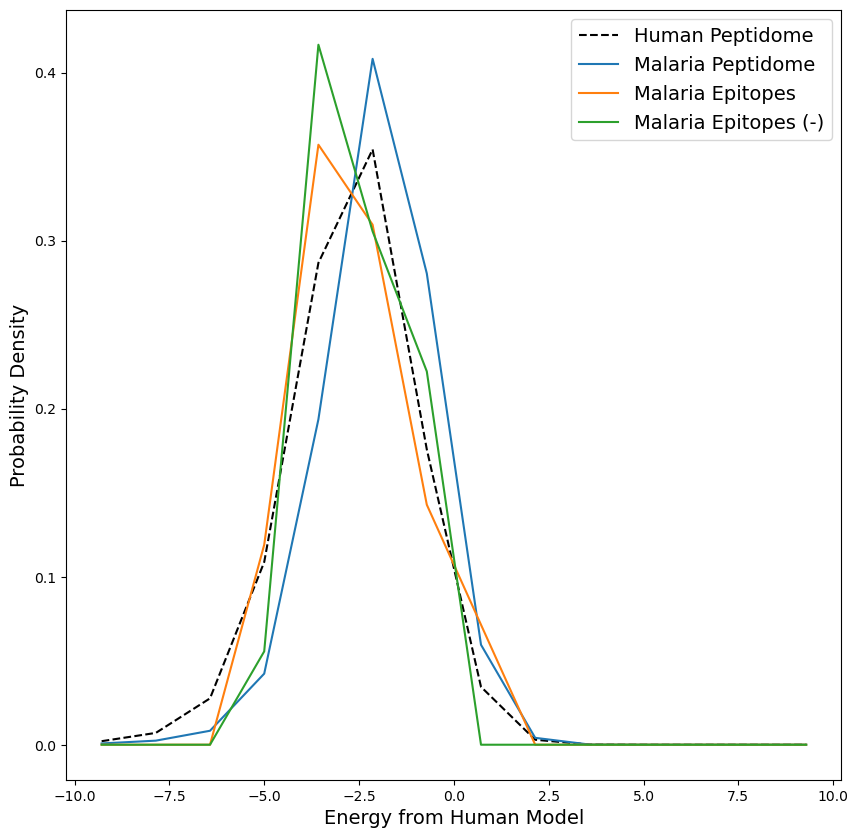

In [35]:
plt.figure(figsize=(10,10))
labels = ['Human Peptidome',
          'Malaria Peptidome',
          'Malaria Epitopes',
          'Malaria Epitopes (-)'
         ]
for name, energy_values in zip(labels,
                               [human_energies,
                                malaria_energies,
                                epitope_energies_elispot,
                                epitope_energies_negative_elispot
                               ]):
    bins = np.linspace(-10, 10, 15)
    count, bins_count = np.histogram(energy_values,bins=bins)
    pdf = count / sum(count)
    
#     plt.subplot(1,2,1)
    if name.startswith('Human'):
        plt.plot(0.5*(bins[:-1]+bins[1:]), pdf ,'k--',label=name)
    else:
        plt.plot(0.5*(bins[:-1]+bins[1:]), pdf ,label=name)

colors = ['red','brown','magenta','orange']
# for i in range(len(distance_one)):
#     plt.axvline(energy(d1_matrix[i,:]), color=colors[i],linestyle='--', label=distance_one[i])
# plt.axvline(e3_energy, color='r', linestyle='--', label=e3)

plt.xlabel('Energy from Human Model',fontsize=14)
plt.ylabel('Probability Density',fontsize=14)
plt.legend(loc='upper right',fontsize=14)
# 

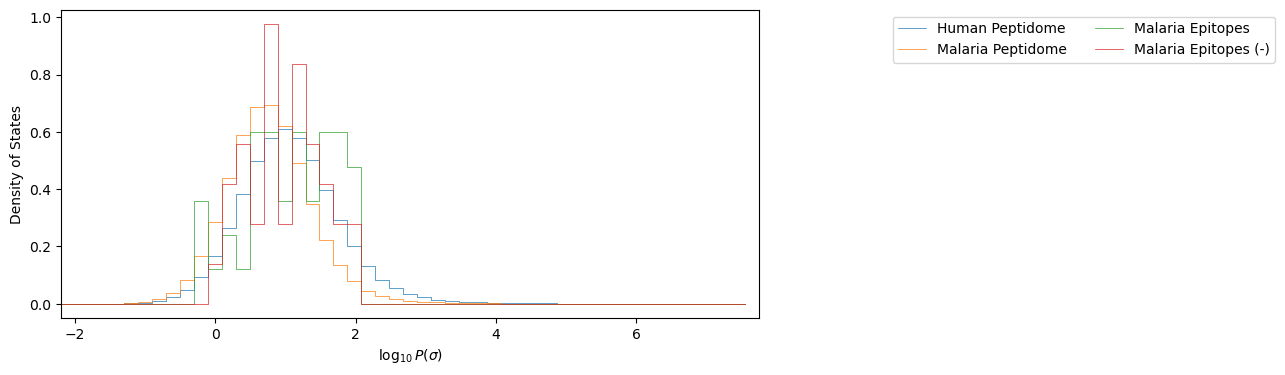

In [52]:
fig, ax = plt.subplots(figsize=(9, 4), ncols=1, nrows=1)
xmax = np.log10(np.exp(-min(malaria_energies)-0.05))
xmin = np.log10(np.exp(-max(human_energies)+0.05))
nbins = 50
scaley = nbins/(xmax-xmin)
bins = np.linspace(xmin, xmax, num=nbins+1)
kwargs = dict(lw=0.5)
for name, energy_values in zip(labels,
                               [human_energies,
                                malaria_energies,
                                epitope_energies_elispot,
                                epitope_energies_negative_elispot
                               ]):
    values = np.exp(-1*(np.array(energy_values)))
    counts, bins = np.histogram(np.log10(values), bins=bins)
    counts = counts/np.sum(counts)
    ax.step(bins[:-1], counts*scaley, label=name, where='mid', **kwargs)
ax.set_xlabel(r'$\log_{10} P(\sigma)$')
ax.set_xlim(min(bins), max(bins))
ax.set_ylabel('Density of States')
ax.legend(loc='upper right', ncol=2,bbox_to_anchor=(1.75, 1.0))
# ax.set_yscale('log')

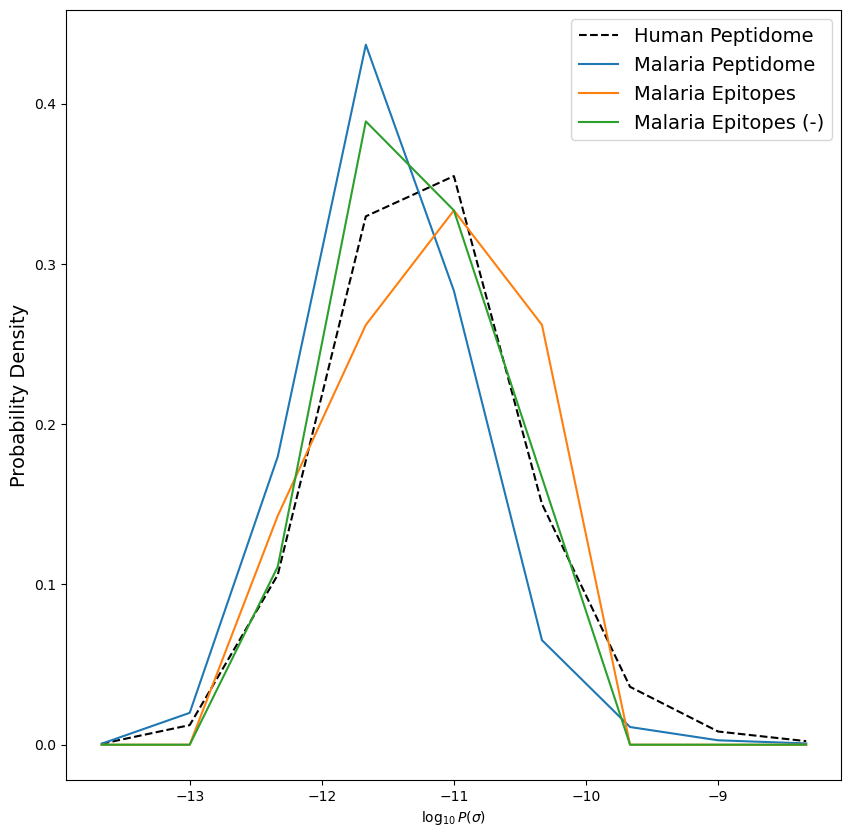

In [61]:
plt.figure(figsize=(10,10))
labels = ['Human Peptidome',
          'Malaria Peptidome',
          'Malaria Epitopes',
          'Malaria Epitopes (-)'
         ]
for name, values in zip(labels,
                               [logp_human,
                                logp_malaria,
                                logp_epitopes_elispot,
                                logp_negative_epitopes_elispot
                               ]):
    bins = np.linspace(-14, -8, 10)
    count, bins_count = np.histogram(np.array(values)/np.log(10),bins=bins)
    pdf = count / sum(count)
    
#     plt.subplot(1,2,1)
    if name.startswith('Human'):
        plt.plot(0.5*(bins[:-1]+bins[1:]), pdf ,'k--',label=name)
    else:
        plt.plot(0.5*(bins[:-1]+bins[1:]), pdf ,label=name)

colors = ['red','brown','magenta','orange']
# for i in range(len(distance_one)):
#     plt.axvline(energy(d1_matrix[i,:]), color=colors[i],linestyle='--', label=distance_one[i])
# plt.axvline(e3_energy, color='r', linestyle='--', label=e3)

plt.xlabel(r'$\log_{10} P(\sigma)$')
plt.ylabel('Probability Density',fontsize=14)
plt.legend(loc='upper right',fontsize=14)
# plt.yscale('log')
# 

In [51]:
labels = ['Human Peptidome',
          'Malaria Peptidome',
          'Malaria Epitopes',
          'Malaria Epitopes (-)'
         ]

In [67]:
density_dict = {}

for name, values in zip(labels,
                           [logp_human,
                            logp_malaria,
                            logp_epitopes_elispot,
                            logp_negative_epitopes_elispot
                           ]):
    bins = np.linspace(-14, -8, 10)
    count, bins_count = np.histogram(np.array(values)/np.log(10),bins=bins)
    pdf = count / sum(count)
    
    density_dict[name] = {
        'bins': serialize_float_arr(bins),
        'pdf': serialize_float_arr(pdf)
    }
with open('../../figures/New Paper Figures/Figure Data/malaria_pdf.json','w') as jj:
    json.dump(density_dict,jj)

In [52]:
density_dict = {}

for name, values in zip(labels,
                           [logp_human,
                            logp_malaria,
                            logp_epitopes,
                            logp_negative_epitopes
                           ]):
    bins = np.linspace(-14, -8, 10)
    count, bins_count = np.histogram(np.array(values)/np.log(10),bins=bins)
    pdf = count / sum(count)
    
    density_dict[name] = {
        'bins': serialize_float_arr(bins),
        'pdf': serialize_float_arr(pdf)
    }
with open('../../figures/New Paper Figures/Figure Data/malaria_pdf_all_assays.json','w') as jj:
    json.dump(density_dict,jj)

In [ ]:
# human_ll = [loglikelihood(s) for s in kmers_to_matrix(self_kmers)]
# epitope_ll = [loglikelihood(s) for s in kmers_to_matrix(malaria_epitope_kmers)]
# malaria_ll = [loglikelihood(s) for s in kmers_to_matrix(malaria_kmers)]
# epitope_source_ll = [loglikelihood(s) for s in kmers_to_matrix(maria_epitope_source_kmers)]

In [ ]:
human_energies_mhc = [energy(s) for s in kmers_to_matrix(top_haplotype_filtered_kmers["self_kmers"])]
malaria_energies_mhc = [energy(s) for s in kmers_to_matrix(top_haplotype_filtered_kmers["malaria_proteome_kmers"])]

# epitope_energies = [energy(s) for s in kmers_to_matrix(malaria_epitope_kmers)]

epitope_source_energies_mhc = [energy(s) for s in kmers_to_matrix(top_haplotype_filtered_kmers["malaria_epitope_source_kmers"])]

# epitope_energies_elispot = [energy(s) for s in kmers_to_matrix(malaria_epitope_kmers_elispot)]
epitope_source_energies_elispot_mhc = [energy(s) for s in kmers_to_matrix(top_haplotype_filtered_kmers["malaria_epitope_source_kmers_elispot"])]


In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)

labels = ['Human Proteome',
          'Full Malaria Proteome',
          'Malaria Epitopes',
          'Malaria Epitopes Source Protein',
          ]
#           'Malaria Epitopes Source Protein w/o Epitopes']

for name, energy_values in zip(labels,
                               [human_energies,
                                malaria_energies,
                                epitope_energies, epitope_source_energies,
                               ]):
    bins = np.linspace(-10, 10, 15)
    count, bins_count = np.histogram(energy_values,bins=bins)
    pdf = count / sum(count)
    
#     plt.subplot(1,2,1)
    plt.plot(0.5*(bins[:-1]+bins[1:]), pdf ,label=name)

plt.xlabel('Energy')
plt.ylabel('Probability Density')  
plt.legend(loc='upper right',fontsize=8)
plt.title(f'All Assays (N={positive.shape[0]} epitopes)')


plt.subplot(1,2,2)

for name, energy_values in zip(labels,
                               [human_energies,
                                malaria_energies,
                                epitope_energies_elispot, epitope_source_energies_elispot,
                                ]):
    bins = np.linspace(-10, 10, 15)
    count, bins_count = np.histogram(energy_values,bins=bins)
    pdf = count / sum(count)
    
#     plt.subplot(1,2,1)
    plt.plot(0.5*(bins[:-1]+bins[1:]), pdf ,label=name)

plt.xlabel('Energy')
plt.ylabel('Probability Density')  
plt.legend(loc='upper right',fontsize=8)
plt.title(f'ELISPOT Only (N={positive_elispot.shape[0]} epitopes)')

    
# plt.subplot(1,2,2)
# likes = [np.array(vec)-F for vec in [human_ll,malaria_ll,epitope_ll, epitope_source_ll]]
# # plt.bar(np.arange(4),means, width=.2)
# plt.boxplot(likes)
# plt.xticks(np.arange(4),labels,rotation=45)
# plt.ylabel('Avg Likelihood')

# plt.savefig('plots/energies_malaria_epitopes_elispot_vs.png')






In [ ]:
e1 = 'SFLFVEALF'
e2 = 'FVEALFQEY'
e3 = 'LAILSVSSF'
e4 = 'YLNKIQNSL'
example_matrix = kmers_to_matrix([e1,e2,e3,e4])
e1_energy = energy(example_matrix[0,:])
e2_energy = energy(example_matrix[1,:])
e3_energy = energy(example_matrix[2,:])
e4_energy = energy(example_matrix[3,:])


plt.figure(figsize=(20,6))

plt.subplot(1,2,1)

labels = ['Human Proteome',
          'Full Malaria Proteome',
          'Malaria Epitopes',
          'Malaria Epitopes Source Protein']
#           'Malaria Epitopes Source Protein w/o Epitopes']

for name, energy_values in zip(labels,
                               [human_energies,malaria_energies,epitope_energies, epitope_source_energies]):
    bins = np.linspace(-10, 10, 15)
    count, bins_count = np.histogram(energy_values,bins=bins)
    pdf = count / sum(count)
    
#     plt.subplot(1,2,1)
    plt.plot(0.5*(bins[:-1]+bins[1:]), pdf ,label=name)

# plt.axvline(e1_energy, color='k', linestyle='--', label=e1)
plt.axvline(e3_energy, color='k', linestyle='--', label=e3)

plt.xlabel('Energy')
plt.ylabel('Probability Density')  
plt.legend(loc='upper right',fontsize=8)
plt.title(f'All Assays (N={positive.shape[0]} epitopes)')


plt.subplot(1,2,2)

for name, energy_values in zip(labels,
                               [human_energies,malaria_energies,epitope_energies_elispot, epitope_source_energies_elispot]):
    bins = np.linspace(-10, 10, 15)
    count, bins_count = np.histogram(energy_values,bins=bins)
    pdf = count / sum(count)
    
#     plt.subplot(1,2,1)
    plt.plot(0.5*(bins[:-1]+bins[1:]), pdf ,label=name)
# plt.axvline(e1_energy, color='k', linestyle='--', label=e1)
plt.axvline(e3_energy, color='k', linestyle='--', label=e3)
plt.xlabel('Energy')
plt.ylabel('Probability Density')  
plt.legend(loc='upper right',fontsize=8)
plt.title(f'ELISPOT Only (N={positive_elispot.shape[0]} epitopes)')

    
# plt.subplot(1,2,2)
# likes = [np.array(vec)-F for vec in [human_ll,malaria_ll,epitope_ll, epitope_source_ll]]
# # plt.bar(np.arange(4),means, width=.2)
# plt.boxplot(likes)
# plt.xticks(np.arange(4),labels,rotation=45)
# plt.ylabel('Avg Likelihood')

plt.savefig('plots/energies_malaria_epitopes_with_examples.png')






In [ ]:
plt.figure(figsize=(20,6))

plt.subplot(1,2,1)

labels = ['Human Proteome MHC Binders',
          'Full Malaria Proteome MHC Binders',
          'Malaria Epitopes',
          'Malaria Epitopes Source Protein MHC Binders']

for name, energy_values in zip(labels,
                               [human_energies_mhc,
                                malaria_energies_mhc,
                                epitope_energies, epitope_source_energies_mhc
                               ]):
    bins = np.linspace(-10, 10, 15)
    count, bins_count = np.histogram(energy_values,bins=bins)
    pdf = count / sum(count)
    
#     plt.subplot(1,2,1)
    plt.plot(0.5*(bins[:-1]+bins[1:]), pdf ,label=name)

plt.xlabel('Energy')
plt.ylabel('Probability Density')  
plt.legend(loc='upper right',fontsize=8)
plt.title(f'All Assays (N={positive.shape[0]} epitopes)')


plt.subplot(1,2,2)

for name, energy_values in zip(labels,
                               [human_energies_mhc,
                                malaria_energies_mhc,
                                epitope_energies_elispot,
                                epitope_source_energies_elispot_mhc]):
    bins = np.linspace(-10, 10, 15)
    count, bins_count = np.histogram(energy_values,bins=bins)
    pdf = count / sum(count)
    
#     plt.subplot(1,2,1)
    plt.plot(0.5*(bins[:-1]+bins[1:]), pdf ,label=name)

plt.xlabel('Energy')
plt.ylabel('Probability Density')  
plt.legend(loc='upper right',fontsize=8)
plt.title(f'ELISPOT Only (N={positive_elispot.shape[0]} epitopes)')

    
# plt.subplot(1,2,2)
# likes = [np.array(vec)-F for vec in [human_ll,malaria_ll,epitope_ll, epitope_source_ll]]
# # plt.bar(np.arange(4),means, width=.2)
# plt.boxplot(likes)
# plt.xticks(np.arange(4),labels,rotation=45)
# plt.ylabel('Avg Likelihood')

plt.savefig('plots/energies_mhc_malaria_epitopes_elispot_vs.png')






In [ ]:
e1 = 'SFLFVEALF'
e2 = 'FVEALFQEY'
e3 = 'LAILSVSSF'
e4 = 'YLNKIQNSL'
example_matrix = kmers_to_matrix([e1,e2,e3,e4])
e1_energy = energy(example_matrix[0,:])
e2_energy = energy(example_matrix[1,:])
e3_energy = energy(example_matrix[2,:])
e4_energy = energy(example_matrix[3,:])


plt.figure(figsize=(20,6))

plt.subplot(1,2,1)

labels = ['Human Proteome MHC Binders',
          'Full Malaria Proteome MHC Binders',
          'Malaria Epitopes',
          'Malaria Epitopes Source Protein MHC Binders']

for name, energy_values in zip(labels,
                               [human_energies_mhc,
                                malaria_energies_mhc,
                                epitope_energies, epitope_source_energies_mhc
                               ]):
    bins = np.linspace(-10, 10, 15)
    count, bins_count = np.histogram(energy_values,bins=bins)
    pdf = count / sum(count)
    
#     plt.subplot(1,2,1)
    plt.plot(0.5*(bins[:-1]+bins[1:]), pdf ,label=name)

# plt.axvline(e1_energy, color='k', linestyle='--', label=e1)
plt.axvline(e3_energy, color='k', linestyle='--', label=e3)

plt.xlabel('Energy')
plt.ylabel('Probability Density')  
plt.legend(loc='upper right',fontsize=8)
plt.title(f'All Assays (N={positive.shape[0]} epitopes)')


plt.subplot(1,2,2)

for name, energy_values in zip(labels,
                               [human_energies_mhc,
                                malaria_energies_mhc,
                                epitope_energies_elispot,
                                epitope_source_energies_elispot_mhc]):
    bins = np.linspace(-10, 10, 15)
    count, bins_count = np.histogram(energy_values,bins=bins)
    pdf = count / sum(count)
    
#     plt.subplot(1,2,1)
    plt.plot(0.5*(bins[:-1]+bins[1:]), pdf ,label=name)
# plt.axvline(e1_energy, color='k', linestyle='--', label=e1)
plt.axvline(e3_energy, color='k', linestyle='--', label=e3)
plt.xlabel('Energy')
plt.ylabel('Probability Density')  
plt.legend(loc='upper right',fontsize=8)
plt.title(f'ELISPOT Only (N={positive_elispot.shape[0]} epitopes)')

    
# plt.subplot(1,2,2)
# likes = [np.array(vec)-F for vec in [human_ll,malaria_ll,epitope_ll, epitope_source_ll]]
# # plt.bar(np.arange(4),means, width=.2)
# plt.boxplot(likes)
# plt.xticks(np.arange(4),labels,rotation=45)
# plt.ylabel('Avg Likelihood')

plt.savefig('plots/energies_mhc_malaria_epitopes_with_examples.png')






In [ ]:
e3_energy
e3
#  https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7010280/
#  https://malariajournal.biomedcentral.com/articles/10.1186/1475-2875-12-185/tables/7

In [ ]:
# plt.figure(figsize=(10,6))

# labels = ['Human Proteome',
#           'Full Malaria Proteome',
#           'Malaria Epitopes',
#           'Malaria Epitopes Source Protein']
# #           'Malaria Epitopes Source Protein w/o Epitopes']

# for name, ll_values in zip(labels,
#                                [human_ll,malaria_ll,epitope_ll, epitope_source_ll]):
# #     bins = np.linspace(-10, 10, 15)
#     count, bins_count = np.histogram(np.log10(np.exp(ll_values)),bins=50)
#     pdf = count / sum(count)
    
# #     plt.subplot(1,2,1)
#     plt.plot(0.5*(bins_count[:-1]+bins_count[1:]), pdf ,label=name)
#     plt.yscale('log')

# plt.xlabel('$log_{10}P(\sigma)$')
# plt.ylabel('Probability Density')  
# plt.legend(loc='upper right',fontsize=8)

In [ ]:
from collections import Counter as cCounter
    
def get_aa_freq(kmers):
    counts = cCounter("".join(kmers))
    denominator = len(kmers)*len(kmers[0])
    f = {letter: counts[letter]/denominator for letter in counts}
    return f
    

In [ ]:
f_malaria = get_aa_freq(malaria_kmers)
f_epitopes = get_aa_freq(malaria_epitope_kmers)
f_epitopes_elispot = get_aa_freq(malaria_epitope_kmers_elispot)
f_epitopes_source = get_aa_freq(malaria_epitope_source_kmers)
f_epitopes_elispot_source = get_aa_freq(malaria_epitope_source_kmers_elispot)

In [ ]:
f_human = get_aa_freq(self_kmers)

In [ ]:
ssr_malaria = sum((f_human[aa] - f_malaria[aa])**2 for aa in f_human)
ssr_epitopes = sum((f_human[aa] - f_epitopes[aa])**2 for aa in f_human)
ssr_epitopes_elispot = sum((f_human[aa] - f_epitopes_elispot[aa])**2 for aa in f_human)
ssr_epitopes_source = sum((f_human[aa] - f_epitopes_source[aa])**2 for aa in f_human)
ssr_epitopes_elispot_source = sum((f_human[aa] - f_epitopes_elispot_source[aa])**2 for aa in f_human)

In [ ]:
ssr_malaria

In [ ]:
ssr_epitopes

In [ ]:
fontsize=8

In [ ]:
fig, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(6,5),sharex=True)
x = [f_human[aa] for aa in f_human]
y1 = [f_malaria[aa] for aa in f_human]
y2 = [f_epitopes[aa] for aa in f_human]
y3 = [f_epitopes_source[aa] for aa in f_human]

ax1.scatter(x, y1, color='b', s=8,label='Full Malaria Proteome')
ax2.scatter(x, y2, color='b', s=8,label='Malaria Epitopes')
ax3.scatter(x, y3, color='b', s=8,label='Malaria Epitopes Source Proteins')


def random_jiggle(x,y):
    r1 = np.random.random() - 0.5
    r1 *= .0015
    r2 = np.random.random() - 0.5
    r2 *= .0015
    
    return (x+r1,y+r2)

for aa in f_human:
    ax1.annotate(aa, random_jiggle(f_human[aa],f_malaria[aa]),fontsize=fontsize)
    ax2.annotate(aa, random_jiggle(f_human[aa],f_epitopes[aa]),fontsize=fontsize)
    ax3.annotate(aa, random_jiggle(f_human[aa],f_epitopes_source[aa]),fontsize=fontsize)

ax1.annotate("SSR: %.5f" % ssr_malaria, (.020, .185),fontsize=fontsize)
ax2.annotate("SSR: %.5f" % ssr_epitopes, (.020, .185),fontsize=fontsize)
ax3.annotate("SSR: %.5f" % ssr_epitopes_source, (.020, .185),fontsize=fontsize)

ax1.plot([0,.12],[0,.2], 'k--')
ax2.plot([0,.12],[0,.2], 'k--')
ax3.plot([0,.15],[0,.2], 'k--')
ax3.set_xlim([0,.12])
# ax1.set_xlabel('Human Proteome AA Frequency',fontsize=16)
# ax2.set_xlabel('Human Proteome AA Frequency',fontsize=16)
ax3.set_xlabel('AA Frequency Human Proteome',fontsize=fontsize)

ax1.set_ylabel('AA Frequency \n Malaria Proteome',fontsize=fontsize)
ax2.set_ylabel('AA Frequency \n Malaria Epitopes',fontsize=fontsize)
ax3.set_ylabel('AA Frequency \n Malaria Epitopes \n Source Proteins',fontsize=fontsize)
ax1.set_title(f'All Assays (N={positive.shape[0]} epitopes)',fontsize=fontsize+2)

plt.savefig('plots/aa_freq_malaria.png')

In [ ]:
fig, [ax1,ax2,ax3] = plt.subplots(3,1,figsize=(6,5),sharex=True)
x = [f_human[aa] for aa in f_human]
y1 = [f_malaria[aa] for aa in f_human]
y2 = [f_epitopes_elispot[aa] for aa in f_human]
y3 = [f_epitopes_elispot_source[aa] for aa in f_human]

ax1.scatter(x, y1, color='b', s=8,label='Full Malaria Proteome')
ax2.scatter(x, y2, color='b', s=8,label='Malaria Epitopes')
ax3.scatter(x, y3, color='b', s=8,label='Malaria Epitopes Source Proteins')


def random_jiggle(x,y):
    r1 = np.random.random() - 0.5
    r1 *= .0015
    r2 = np.random.random() - 0.5
    r2 *= .0015
    
    return (x+r1,y+r2)

for aa in f_human:
    ax1.annotate(aa, random_jiggle(f_human[aa],f_malaria[aa]),fontsize=fontsize)
    ax2.annotate(aa, random_jiggle(f_human[aa],f_epitopes_elispot[aa]),fontsize=fontsize)
    ax3.annotate(aa, random_jiggle(f_human[aa],f_epitopes_elispot_source[aa]),fontsize=fontsize)

ax1.annotate("SSR: %.5f" % ssr_malaria, (.020, .185),fontsize=fontsize)
ax2.annotate("SSR: %.5f" % ssr_epitopes_elispot, (.020, .185),fontsize=fontsize)
ax3.annotate("SSR: %.5f" % ssr_epitopes_elispot_source, (.020, .185),fontsize=fontsize)

ax1.plot([0,.12],[0,.2], 'k--')
ax2.plot([0,.12],[0,.2], 'k--')
ax3.plot([0,.15],[0,.2], 'k--')
ax3.set_xlim([0,.12])
# ax1.set_xlabel('Human Proteome AA Frequency',fontsize=16)
# ax2.set_xlabel('Human Proteome AA Frequency',fontsize=16)
ax3.set_xlabel('AA Frequency Human Proteome',fontsize=fontsize)

ax1.set_ylabel('AA Frequency \n Malaria Proteome',fontsize=fontsize)
ax2.set_ylabel('AA Frequency \n Malaria Epitopes',fontsize=fontsize)
ax3.set_ylabel('AA Frequency \n Malaria Epitopes \n Source Proteins',fontsize=fontsize)

ax1.set_title(f'ELISPOT Only (N={positive_elispot.shape[0]} epitopes)',fontsize=fontsize+2)


plt.savefig('plots/aa_freq_elispot_malaria.png')

In [ ]:
def subcategorybar(X, vals, clist, labellist):
    width=0.5
    n = len(vals)
    _X = np.arange(len(X))
    for i in range(n):
        plt.bar(_X - width/2. + i/float(n)*width, vals[i].values(), 
                width=width/float(n), align="edge", color=clist[i], label=labellist[i])   
    plt.xticks(_X, X)
    plt.legend(loc='upper right')

aminoacids = 'ACDEFGHIKLMNPQRSTVWY'
plt.figure(figsize=(20,7))
subcategorybar(list(aminoacids), [f_human, f_malaria, f_epitopes],
              ['r', 'orange', 'b'], 
               ['human proteome', 'malaria proteome', 'malaria epitopes'])
plt.ylabel('Frequency')
plt.xlabel('Amino Acids')
plt.title('Amino Acid Distributions')
# plt.savefig('./Figures/peptides/aa_distributions.pdf')


In [29]:
reference = selfset
def mat_to_dist(A, size=100000):
    if A.shape[0] > size:
        sample = matrix_to_kmers(A[np.random.choice(A.shape[0], size=size, replace=False), :])
    else:
        sample = matrix_to_kmers(A)
    ns = nndist_hamming_distribution(sample, reference)
    return ns

In [ ]:
print("--")
malaria_ns = mat_to_dist(kmers_to_matrix(malaria_kmers))
print("--")
epitope_ns = mat_to_dist(kmers_to_matrix(malaria_epitope_kmers))
print("--")
epitope_source_ns = mat_to_dist(kmers_to_matrix(malaria_epitope_source_kmers))
print("--")

epitope_ns_elispot = mat_to_dist(kmers_to_matrix(malaria_epitope_kmers_elispot))
print("--")
epitope_source_ns_elispot = mat_to_dist(kmers_to_matrix(malaria_epitope_source_kmers_elispot))

In [ ]:
random_ns = mat_to_dist(np.random.choice(np.arange(0, 20, 1), size=(100000,9)))

In [ ]:
np.random.choice(np.arange(0, 20, 1), size=(2,9))


In [30]:
epitope_ns_elispot_negative = mat_to_dist(kmers_to_matrix(malaria_negative_epitope_kmers_elispot))

print("--")
epitope_ns_negative = mat_to_dist(kmers_to_matrix(malaria_negative_epitope_kmers))

--


In [32]:
save_data = {
    'malaria': serialize_int_arr(malaria_ns),
    'epitopes': serialize_int_arr(epitope_ns),
    'epitope_source': serialize_int_arr(epitope_source_ns),
    'epitope_elispot': serialize_int_arr(epitope_ns_elispot),
    'epitope_source_elispot': serialize_int_arr(epitope_source_ns_elispot),
    'null': serialize_int_arr(random_ns),
    'epitope_negative': serialize_int_arr(epitope_ns_negative),
    'epitope_negative_elispot': serialize_int_arr(epitope_ns_elispot_negative),
    
}

with open('./data/malaria_distance_to_self.json','w') as f:
    json.dump(save_data, f)

In [2]:
with open('./data/malaria_distance_to_self.json','r') as f:
    distances_data = json.load(f)

In [3]:
distances_data

{'malaria': [325, 2236, 37932, 59507],
 'epitopes': [0, 3, 28, 28],
 'epitope_source': [0, 129, 2100, 1831],
 'epitope_elispot': [0, 1, 21, 20],
 'epitope_source_elispot': [0, 127, 2011, 1785],
 'null': [1, 365, 18931, 80703],
 'epitope_negative': [0, 4, 16, 36],
 'epitope_negative_elispot': [0, 2, 12, 22]}

In [75]:
d_v = np.array(distances_data['null'])
d_v = d_v/sum(d_v)
d_v


array([1.0000e-05, 3.6500e-03, 1.8931e-01, 8.0703e-01])

In [4]:
malaria_ns = distances_data['malaria']
epitope_ns = distances_data['epitopes']
epitope_source_ns = distances_data['epitope_source']
epitope_ns_elispot = distances_data['epitope_elispot']

epitope_source_ns_elispot = distances_data['epitope_source_elispot']
random_ns = distances_data['null']

epitope_ns_negative = distances_data['epitope_negative']
epitope_ns_negative_elispot = distances_data['epitope_negative_elispot']

Text(0.5, 0, 'Distance to nearest self peptide')

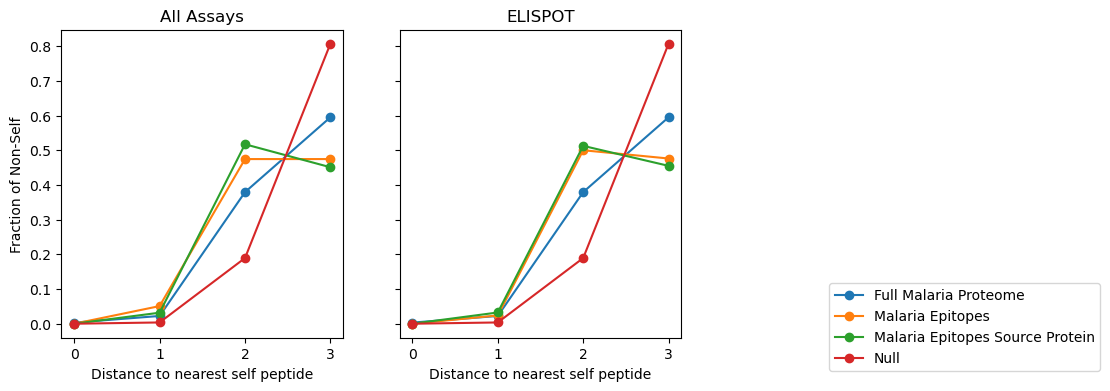

In [5]:
fig, [ax1,ax2] = plt.subplots(figsize=(8, 4), ncols=2, sharey=True)

labels = [
          'Full Malaria Proteome',
          'Malaria Epitopes',
          'Malaria Epitopes Source Protein',
          'Null']
for name, _ns in zip(labels,[malaria_ns, epitope_ns, epitope_source_ns, random_ns]):
    ns = np.array(_ns)
    ps = ns/sum(ns)
    
    ax1.plot(range(4), ps, '-o', label=name)

for name, _ns in zip(labels,[malaria_ns, epitope_ns_elispot, epitope_source_ns_elispot,random_ns]):
    ns = np.array(_ns)
    ps = ns/sum(ns)
    
    ax2.plot(range(4), ps, '-o', label=name)
    
# ax1.set_yscale('log')
ax1.set_title('All Assays')
ax2.set_title('ELISPOT')
ax2.legend(loc='upper left',bbox_to_anchor=(1.5,.2))
ax1.set_ylabel('Fraction of Non-Self')
ax1.set_xlabel('Distance to nearest self peptide')
ax2.set_xlabel('Distance to nearest self peptide')

# ax1.set_ylim(10e-10, 1.1)
# ax1.set_yticks(10**np.arange(-3.0, 1.0, 1.0))
# ax2.set_ylim(10e-5, 1.1)
# ax2.set_yticks(10**np.arange(-3.0, 1.0, 1.0))

In [ ]:
ps

In [ ]:
epitope_source_ns

In [ ]:
import pyrepseq as prs

In [ ]:
prs.nndist_hamming(e1, selfset, maxdist=4)

In [ ]:
prs.nndist_hamming(e2, selfset, maxdist=4)

In [ ]:
prs.nndist_hamming(e3, selfset, maxdist=4)

In [ ]:
prs.nndist_hamming(e4, selfset, maxdist=4)

In [ ]:
d1

In [ ]:
# distance one
d1 = {}
d2 = {}
d3 = {}

labels = [
          'Malaria Peptidome',
          'Malaria Epitopes',
          'Null Model']
for name, _ns in zip(labels,[malaria_ns, epitope_ns,random_ns]):
    ns = np.array(_ns)
    ps = ns/sum(ns)
    d1[name] = ps[1]
    d2[name] = ps[2]
    d3[name] = ps[3]

In [84]:
rows = []
labels = ['Malaria Peptidome', 'Malaria Epitopes (-)', 'Malaria Epitopes (+)']
for name, _ns in zip(labels,[malaria_ns, epitope_ns_negative_elispot, epitope_ns_elispot]):
    ns = np.array(_ns)
    ps = ns/sum(ns)
    for i in range(4):
        rows.append({
            'distance_bin': i,
            'source': name,
            'value': ps[i]
    })

distances_df = pd.DataFrame(columns=['distance_bin','source','value'],data=rows)

In [85]:
distances_df['distance'] = distances_df['distance_bin'].apply(lambda x: f"{x}" if x < 3 else f"{x}+")

In [86]:
distances_df

,distance_bin,source,value,distance
0,0,Malaria Peptidome,0.003250,0
1,1,Malaria Peptidome,0.022360,1
2,2,Malaria Peptidome,0.379320,2
3,3,Malaria Peptidome,0.595070,3+
4,0,Malaria Epitopes (-),0.000000,0
5,1,Malaria Epitopes (-),0.055556,1
6,2,Malaria Epitopes (-),0.333333,2
7,3,Malaria Epitopes (-),0.611111,3+
8,0,Malaria Epitopes (+),0.000000,0
9,1,Malaria Epitopes (+),0.023810,1


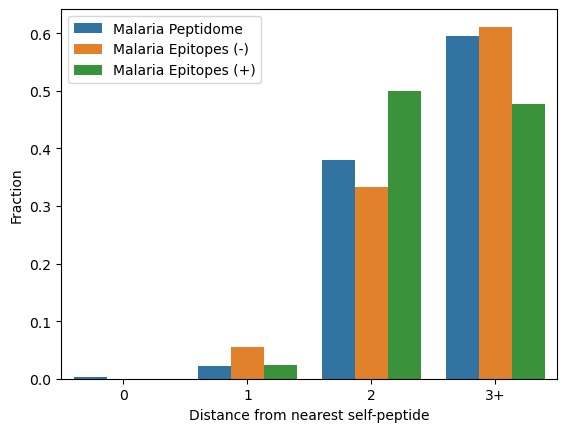

In [88]:
import seaborn as sns
ax = sns.barplot(distances_df, x='distance', y='value', hue='source')
ax.set_xlabel('Distance from nearest self-peptide')
ax.set_ylabel('Fraction')
ax.legend_.set_title('')

In [90]:
distances_df.to_csv('../../figures/New Paper Figures/Figure Data/malaria_distances.csv')

In [9]:
rows = []
labels = ['Malaria Peptidome', 'Malaria Epitopes (-)', 'Malaria Epitopes (+)']
for name, _ns in zip(labels,[malaria_ns, epitope_ns_negative, epitope_ns]):
    ns = np.array(_ns)
    ps = ns/sum(ns)
    for i in range(4):
        rows.append({
            'distance_bin': i,
            'source': name,
            'value': ps[i]
    })

distances_df_all_assays = pd.DataFrame(columns=['distance_bin','source','value'],data=rows)
distances_df_all_assays['distance'] = distances_df_all_assays['distance_bin'].apply(lambda x: f"{x}" if x < 3 else f"{x}+")

In [10]:
distances_df_all_assays.to_csv('../../figures/New Paper Figures/Figure Data/malaria_distances_all_assays.csv')

In [ ]:
plt.figure(figsize=(10,10))
plt.bar(d2.keys(),d2.values(),color='blue')
plt.xticks(fontsize=18)
plt.ylabel('Fraction at dist=2',fontsize=18)

In [ ]:
plt.figure(figsize=(10,10))
labels = ['Human Peptidome',
          'Malaria Peptidome',
          'Malaria Epitopes',
         ]
for name, energy_values in zip(labels,
                               [human_energies,
                                malaria_energies,
                                epitope_energies
                               ]):
    bins = np.linspace(-10, 10, 15)
    count, bins_count = np.histogram(energy_values,bins=bins)
    pdf = count / sum(count)
    
#     plt.subplot(1,2,1)
    if name.startswith('Human'):
        plt.plot(0.5*(bins[:-1]+bins[1:]), pdf ,'k--',label=name)
    else:
        plt.plot(0.5*(bins[:-1]+bins[1:]), pdf ,label=name)

# plt.axvline(e1_energy, color='k', linestyle='--', label=e1)
# plt.axvline(e3_energy, color='r', linestyle='--', label=e3)

plt.xlabel('Energy from Human Model',fontsize=14)
plt.ylabel('Probability Density',fontsize=14)
plt.legend(loc='upper right',fontsize=14)
# 

In [ ]:
e1 = 'SFLFVEALF'
e2 = 'FVEALFQEY'
e3 = 'LAILSVSSF'
e4 = 'YLNKIQNSL'

In [ ]:
distance_one = []
for kmer in malaria_epitope_kmers:
    d = prs.nndist_hamming(kmer, selfset, maxdist=4)
    if d<2:
        print(kmer)
        distance_one.append(kmer)

In [ ]:
for pep in distance_one:
    one_away = prs.levenshtein_neighbors(pep)
    for neighbor in one_away:
        if neighbor in selfset:
            print(f"Found: {neighbor}")

In [ ]:
d1_matrix = kmers_to_matrix(distance_one)

for i in range(len(distance_one)):
    print(energy(d1_matrix[i,:]))



In [ ]:
plt.figure(figsize=(10,10))
labels = ['Human Peptidome',
          'Malaria Peptidome',
          'Malaria Epitopes',
         ]
for name, energy_values in zip(labels,
                               [human_energies,
                                malaria_energies,
                                epitope_energies
                               ]):
    bins = np.linspace(-10, 10, 15)
    count, bins_count = np.histogram(energy_values,bins=bins)
    pdf = count / sum(count)
    
#     plt.subplot(1,2,1)
    if name.startswith('Human'):
        plt.plot(0.5*(bins[:-1]+bins[1:]), pdf ,'k--',label=name)
    else:
        plt.plot(0.5*(bins[:-1]+bins[1:]), pdf ,label=name)

colors = ['red','brown','magenta']
for i in range(len(distance_one)):
    plt.axvline(energy(d1_matrix[i,:]), color=colors[i],linestyle='--', label=distance_one[i])
# plt.axvline(e3_energy, color='r', linestyle='--', label=e3)

plt.xlabel('Energy from Human Model',fontsize=14)
plt.ylabel('Probability Density',fontsize=14)
plt.legend(loc='upper right',fontsize=14)
# 

In [ ]:
positive[positive['Epitope','Description']=='VLAGLLGNV'][(('MHC', 'Allele Name'))]

In [ ]:
positive[positive['Epitope','Description']=='LAILSVSSF'][(('MHC', 'Allele Name'))]

In [ ]:
positive[positive['Epitope','Description']=='GIAGGLALL'][(('MHC', 'Allele Name'))]

In [ ]:
d1.values()

In [ ]:
0.05084745762711865/0.02236

In [ ]:
sys.path.append('/data/lareauc/levinej/pep/CFIT')

In [ ]:
from cfit.fitness.neo_quality.EpitopeDistance import EpitopeDistance

In [ ]:
epidist = EpitopeDistance(model_name='all_tcr_all_combos_model')

In [ ]:
def dist(epiA,epiB):
    return sum(
    [epidist.d_i[i] * epidist.M_ab[epidist.amino_acid_dict[epiA[i]], epidist.amino_acid_dict[epiB[i]]] for i in range(9)])

In [ ]:
dist('GAAGGLALL', 'GIAGGLALL')

In [ ]:
dist('VLAGLLGMV', 'VLAGLLGNV')

In [ ]:
dist('LGILSVSSF', 'LAILSVSSF')

In [70]:
epitope_ns_elispot_negative

array([ 0,  2, 12, 22])

In [71]:
epitope_ns_negative

array([ 0,  4, 16, 36])

In [11]:
malaria_abundance_df = pd.read_table('data/malaria/5833-WHOLE_ORGANISM-integrated.txt',skiprows=11)

In [12]:
malaria_abundance_df

,#string_external_id,abundance
0,5833.PFB0100c,26493.000
1,5833.PFE0065w,18536.000
2,5833.PFC0210c,16733.000
3,5833.PF11_0061,16552.000
4,5833.PF11_0062,11837.000
...,...,...
5079,5833.MAL7P1.20,0.043
5080,5833.PF14_0767,0.027
5081,5833.PFL2620w,0.006
5082,5833.PF11_0516,0.006


In [13]:
malaria_abundance_df['pax_id'] = malaria_abundance_df['#string_external_id'].apply(lambda s: s.removeprefix('5833.'))

In [14]:
mapping_df = pd.read_table('data/malaria/mapping.txt',names=['pax_id','uni_id'])

In [15]:
mapping_df

,pax_id,uni_id
0,MAL13P1.100,C0H5C4_PLAF7
1,MAL13P1.102,Q8IEC9_PLAF7
2,MAL13P1.103,A0A5K1K826_PLAF7
3,MAL13P1.105,Q8IEB9_PLAF7
4,MAL13P1.106,Q8IEB8_PLAF7
...,...,...
5210,PFL2640c,Q8I4P0_PLAF7
5211,PFL2645c,Q8I4N9_PLAF7
5212,PFL2655w,Q8I4N7_PLAF7
5213,PFL2660w,Q8I4N6_PLAF7


In [16]:
merged_abundances = mapping_df.merge(malaria_abundance_df,on=['pax_id'],how='inner')

In [31]:
background_abundance = np.array(merged_abundances['abundance'])
positive_abundance_df = merged_abundances[merged_abundances['uni_id'].isin(set([x.split("|")[-1] for x in names]))]
positive_abundance =  np.array(positive_abundance_df['abundance'])
positive_abundance_df_elispot = merged_abundances[merged_abundances['uni_id'].isin(set([x.split("|")[-1] for x in names_elispot]))]
positive_abundance_elispot =  np.array(positive_abundance_df_elispot['abundance'])

negative_abundance_df = merged_abundances[merged_abundances['uni_id'].isin(set([x.split("|")[-1] for x in negative_names]))]
negative_abundance =  np.array(negative_abundance_df['abundance'])
negative_abundance_df_elispot = merged_abundances[merged_abundances['uni_id'].isin(set([x.split("|")[-1] for x in negative_names_elispot]))]
negative_abundance_elispot =  np.array(negative_abundance_df_elispot['abundance'])

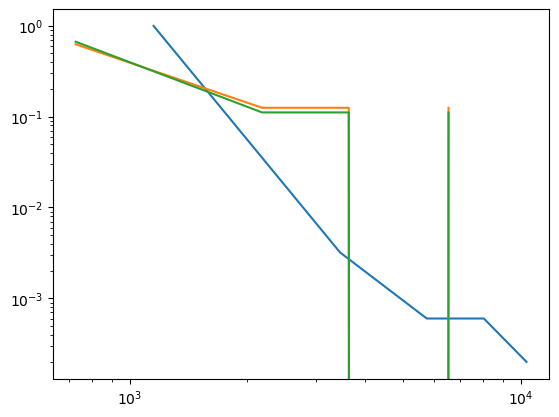

In [81]:
plt.figure()
for name, values in zip(['Malaria Peptides','Epitopes (-)', 'Epitopes (+)'],
                               [background_abundance,
                                positive_abundance,
                                negative_abundance,
                               ]):
#     bins = np.linspace(-14, -8, 10)
    count, bins_count = np.histogram(np.array(values)/np.log(10),bins=5)
    pdf = count / sum(count)
    plt.plot(0.5*(bins_count[:-1]+bins_count[1:]), pdf ,label=name)
plt.xscale('log')
plt.yscale('log')

In [32]:
rows = []
for value in background_abundance:
    rows.append({
        'source': 'background',
        'value': value
    })
for value in positive_abundance:
    rows.append({
        'source': 'positive',
        'value': value
    })
for value in negative_abundance:
    rows.append({
        'source': 'negative',
        'value': value
    })
    
    
rows_elispot = []
for value in background_abundance:
    rows_elispot.append({
        'source': 'background',
        'value': value
    })
for value in positive_abundance_elispot:
    rows_elispot.append({
        'source': 'positive',
        'value': value
    })
for value in negative_abundance_elispot:
    rows_elispot.append({
        'source': 'negative',
        'value': value
    })

In [33]:
abundance_results = pd.DataFrame(data=rows)
abundance_results_elispot = pd.DataFrame(data=rows_elispot)

In [35]:
import seaborn as sns

<Axes: xlabel='source', ylabel='value'>

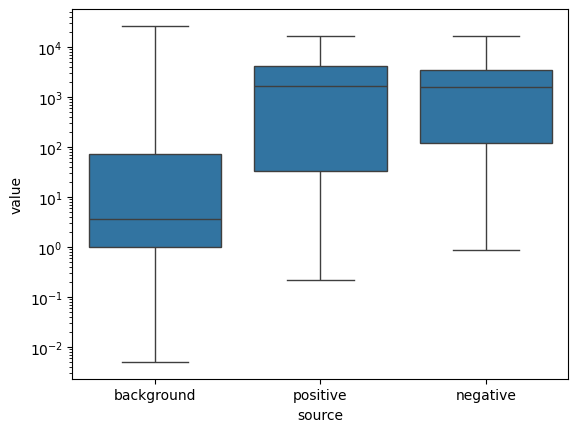

In [36]:
sns.boxplot(abundance_results,x='source',y='value',log_scale=True)

<Axes: xlabel='source', ylabel='value'>

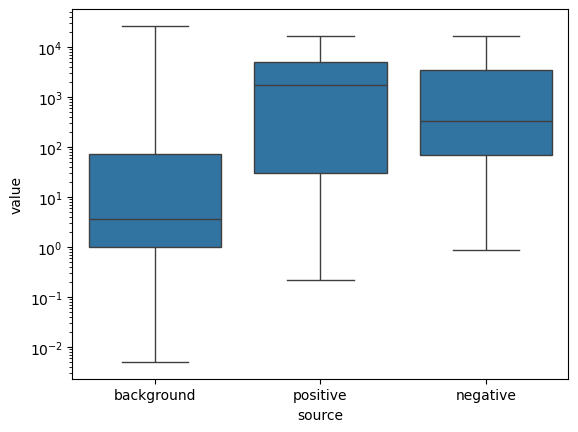

In [37]:
sns.boxplot(abundance_results_elispot,x='source',y='value',log_scale=True)

In [38]:
abundance_results.to_csv('../../figures/New Paper Figures/Figure Data/malaria_abundance_all_assays.csv')

In [39]:
abundance_results_elispot.to_csv('../../figures/New Paper Figures/Figure Data/malaria_abundance.csv')